In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [91]:
import sqlite3

conn = sqlite3.connect("db.sqlite3")

query = '''
SELECT *
FROM restaurant_order AS ro
JOIN restaurant_orderitem AS roi ON ro.id = roi.order_id
JOIN restaurant_product AS rp ON roi.product_id = rp.id
'''

combined_df = pd.read_sql_query(query, conn)

conn.close()

combined_df.to_csv("restaurant.csv", index=False)

restaurant_order = pd.read_csv("restaurant.csv")
df = pd.DataFrame(restaurant_order)

print(len(restaurant_order))


74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

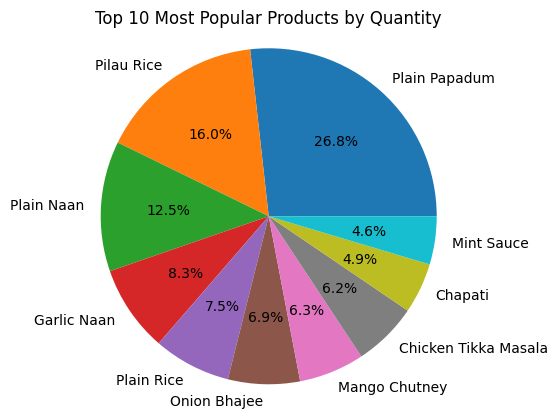

In [92]:
product_sales = df.groupby("name")["quantity"].sum().reset_index()

top_10_products = product_sales.nlargest(10, "quantity")

top_10_products["popularity_percentage"] = (top_10_products["quantity"] / top_10_products["quantity"].sum()) * 100

labels = top_10_products["name"]
sizes = top_10_products["popularity_percentage"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Top 10 Most Popular Products by Quantity")
plt.show()



# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

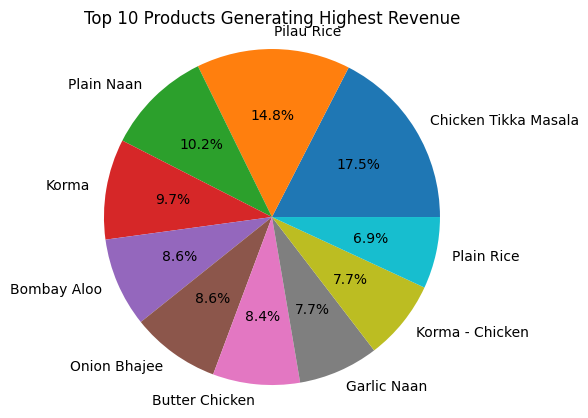

In [93]:
df["item_price"] = df["price"] * df["quantity"]


product_sales = df.groupby("name")["item_price"].sum().reset_index()


top_10_products = product_sales.nlargest(10, "item_price")

top_10_products["revenue_percentage"] = (top_10_products["item_price"] / top_10_products["item_price"].sum()) * 100

labels = top_10_products["name"]
sizes = top_10_products["revenue_percentage"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Top 10 Products Generating Highest Revenue")
plt.show()


 # Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

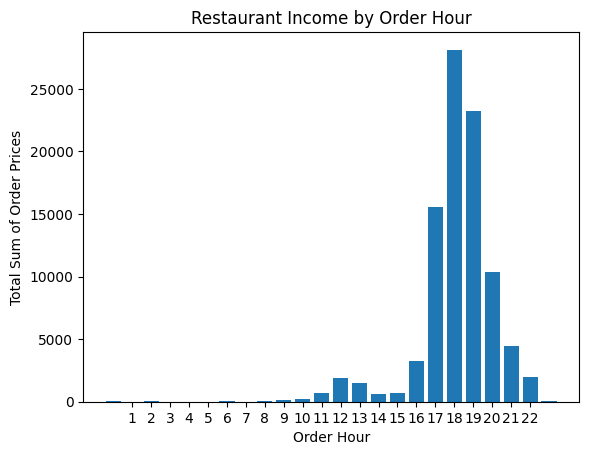

In [94]:
df["timestamp"] = pd.to_datetime(df["datetime"])
df["hour"] = df["timestamp"].dt.hour
hourly_income = df.groupby("hour")["quantity"].sum().reset_index()

plt.bar(hourly_income.hour, hourly_income.quantity)
plt.xlabel("Order Hour")
plt.ylabel("Total Sum of Order Prices")
plt.title("Restaurant Income by Order Hour")
plt.xticks(range(1, 23))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

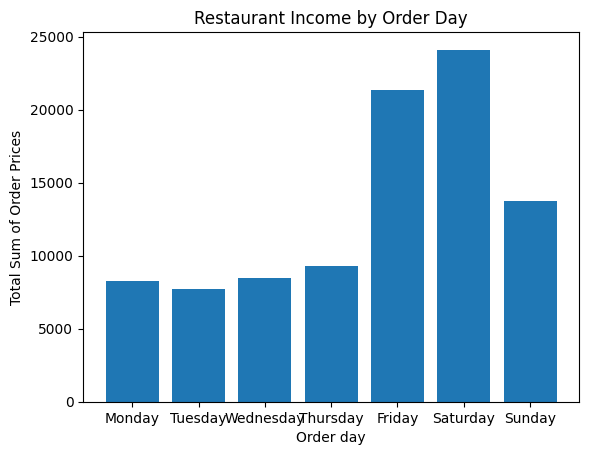

In [95]:

df["day"] = df["timestamp"].dt.day_name()
daily_income = df.groupby("day")["quantity"].sum().reset_index()

sort_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_income = daily_income.sort_values(by="day", key=lambda x: pd.Categorical(x, categories=sort_order))


plt.bar(daily_income.day, daily_income.quantity)
plt.xlabel("Order day")
plt.ylabel("Total Sum of Order Prices")
plt.title("Restaurant Income by Order Day")
plt.xticks(range(7), daily_income.day)

plt.show()

In [96]:
print("Finally, the highest income during the week occurs on the weekends, especially on Friday and Saturday. However, the income levels are relatively average on working days.")

Finally, the highest income during the week occurs on the weekends, especially on Friday and Saturday. However, the income levels are relatively average on working days.
